In [1]:
from importlib import reload
#---------------------------------------------------------------------
import sys, os
import pandas as pd

#---------------------------------------------------------------------
sys.path.insert(0, os.path.realpath('..'))
import Utilities_config
#-----
from AMINonVee_SQL import AMINonVee_SQL
from AMIEndEvents_SQL import AMIEndEvents_SQL
#-----
from DOVSAudit import DOVSAudit
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_sql_aids_dir())
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_utilities_dir())

In [2]:
#--------------------------------------------------
# NOTE: opco is not absolutely necessary, but highly suggested
#       Running data grabs is much more efficient with OPCO, and, if you don't use OPCO frequently
#         you will be contacted by Cloud Computing
#       If one does not want to use opco, simply set opco = None below
#-------------------------
# outg_rec_nb = '14318196'
# opco        = 'oh'

# outg_rec_nb = '14344224'
# opco        = 'ap'

# outg_rec_nb = '14348865'
# opco        = 'ap'

outg_rec_nb = '14562956'
opco        = 'pso'

In [3]:
#--------------------------------------------------
calculate_by_PN               = True
combine_by_PN_likeness_thresh = pd.Timedelta('15 minutes')
expand_outg_search_time_tight = pd.Timedelta('1 hours')
expand_outg_search_time_loose = pd.Timedelta('12 hours')
use_est_outg_times            = False
use_full_ede_outgs            = False
daq_search_time_window        = pd.Timedelta('24 hours')
#-------------------------
# overlaps_addtnl_dovs_sql_kwargs = dict(
#     CI_NB_min  = 0, 
#     CMI_NB_min = 0
# )
overlaps_addtnl_dovs_sql_kwargs = dict(
    CI_NB_min  = None, 
    CMI_NB_min = None
)
#-------------------------
run_outg_inclusion_assessment = True
max_pct_PNs_missing_allowed   = 0
#-------------------------
n_PNs_w_power_threshold       = 95
#-------------------------
#-------------------------
include_suboutg_endpt_plots   = True

In [4]:
#--------------------------------------------------
audit_i = DOVSAudit(
    outg_rec_nb                     = outg_rec_nb, 
    opco                            = opco, 
    calculate_by_PN                 = calculate_by_PN, 
    combine_by_PN_likeness_thresh   = combine_by_PN_likeness_thresh, 
    expand_outg_search_time_tight   = expand_outg_search_time_tight, 
    expand_outg_search_time_loose   = expand_outg_search_time_loose, 
    use_est_outg_times              = use_est_outg_times, 
    use_full_ede_outgs              = use_full_ede_outgs, 
    daq_search_time_window          = daq_search_time_window, 
    overlaps_addtnl_dovs_sql_kwargs = overlaps_addtnl_dovs_sql_kwargs, 
)

#-------------------------
audit_i.build_basic_data(
    slicers_ami                   = None, 
    build_sql_fncn_ami            = AMINonVee_SQL.build_sql_usg, 
    addtnl_build_sql_kwargs_ami   = None, 
    run_std_init_ami              = True, 
    save_args_ami                 = False, 
    #-----
    build_sql_fncn_ede            = AMIEndEvents_SQL.build_sql_end_events, 
    addtnl_build_sql_kwargs_ede   = None, 
    pdpu_only                     = True, 
    run_std_init_ede              = True, 
    save_args_ede                 = False, 
    #-----
    dovs_df                       = None, 
    assert_outg_rec_nb_in_dovs_df = True, 
    #-----
    mp_df                         = None, 
    mp_df_outg_rec_nb_col         = 'OUTG_REC_NB', 
    #-----
    drop_mp_dups_fuzziness        = pd.Timedelta('1 hour'), 
    addtnl_mp_df_cols             = ['technology_tx'], 
    assert_all_PNs_found          = True, 
    consolidate_PNs_batch_size    = 1000, 
    early_return                  = False, 
    
)

#-------------------------
run_result = audit_i.run_audit(
    run_outg_inclusion_assessment = run_outg_inclusion_assessment, 
    max_pct_PNs_missing_allowed   = max_pct_PNs_missing_allowed, 
)

Initializing DOVSAudit object for outg_rec_nb = 14562956
opco                          : pso
calculate_by_PN               : True
combine_by_PN_likeness_thresh : 0 days 00:15:00
expand_outg_search_time_tight : 0 days 01:00:00
expand_outg_search_time_loose : 0 days 12:00:00
use_est_outg_times            : False
use_full_ede_outgs            : False
daq_search_time_window        : 1 days 00:00:00

DOVSOutages_SQL: Found opco in kwargs
Converting to OPERATING_UNIT_ID

Input opcos = ['pso']
OPERATING_UNIT_IDs used = [5]
n_coll     = 11
batch_size = 10000
n_batches  = 1
n_coll     = 11
batch_size = 10000
n_batches  = 1
n_coll     = 11
batch_size = 1000
n_batches  = 1
n_coll     = 11
batch_size = 1000
n_batches  = 1
n_coll     = 11
batch_size = 1000
n_batches  = 1

DOVSOutages_SQL: Found opco in kwargs
Converting to OPERATING_UNIT_ID

Input opcos = ['pso']
OPERATING_UNIT_IDs used = [5]

DOVSOutages_SQL: Found opco in kwargs
Converting to OPERATING_UNIT_ID

Input opcos = ['pso']
OPERATING_UNI

In [5]:
run_result

'Pass'

In [6]:
audit_i.best_ests_df

,PN,i_outg,winner_min,winner_max,conservative_min,conservative_max,zero_times_min,zero_times_max,open_beg,open_end,db_label
0,952954301,0,2025-05-18 03:14:00,2025-05-18 11:01:17,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,True,False,0
1,953554301,0,2025-05-18 03:14:00,2025-05-18 11:01:21,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,True,False,0
2,958164301,0,2025-05-18 03:14:00,2025-05-18 11:01:20,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,True,False,0


In [7]:
#--------------------------------------------------
detailed_summary_df_i, detailed_summary_df_dovs_beg_i = audit_i.get_detailed_summary_df_and_dovs_beg(
    delta_t_off_cut = pd.Timedelta('5min'), 
    delta_t_on_cut  = pd.Timedelta('5min'), 
    delta_ci_cut    = 3, 
    delta_cmi_cut   = None, 
    n_PNs_w_power_threshold = n_PNs_w_power_threshold, 
)

In [8]:
detailed_summary_df_i

,,DT_OFF_TS_FULL,DT_ON_TS,CI_NB,CMI_NB,MJR_CAUSE_CD,MNR_CAUSE_CD,DVC_TYP_NM,OPERATING_UNIT_ID,n_PNs_DOVS,Outage Subset,...,abs_delta_t_off_i,abs_delta_t_on_i,abs_delta_CI_i,delta_t_off_i_flag (|x|>0 days 00:05:00),delta_t_on_i_flag (|x|>0 days 00:05:00),delta_CI_i_flag (|x|>3),sum_flags_i,overall_deltas_flag,first_above_thresh (95),last_above_thresh (95)
OUTAGE_NB,OUTG_REC_NB,,,,,,,,,,,,,,,,,,,,,
6201591,14562956,2025-05-18 08:05:00,2025-05-18 11:05:00,2,360.0,DL,EQF,UNDERGROUND SECONDARY,5,11,Full Outage,...,0 days 04:51:00,0 days 00:03:41,1,1,0,0,1,1,2025-05-18 11:01:21,None


In [9]:
detailed_summary_df_dovs_beg_i

,,DT_OFF_TS_FULL,DT_ON_TS,CI_NB,CMI_NB,MJR_CAUSE_CD,MNR_CAUSE_CD,DVC_TYP_NM,OPERATING_UNIT_ID,n_PNs_DOVS,Outage Subset,...,abs_delta_t_off_i,abs_delta_t_on_i,abs_delta_CI_i,delta_t_off_i_flag (|x|>0 days 00:05:00),delta_t_on_i_flag (|x|>0 days 00:05:00),delta_CI_i_flag (|x|>3),sum_flags_i,overall_deltas_flag,first_above_thresh (95),last_above_thresh (95)
OUTAGE_NB,OUTG_REC_NB,,,,,,,,,,,,,,,,,,,,,
6201591,14562956,2025-05-18 08:05:00,2025-05-18 11:05:00,2,360.0,DL,EQF,UNDERGROUND SECONDARY,5,11,Full Outage,...,0 days,0 days 00:03:41,1,0,0,0,0,0,2025-05-18 11:01:21,None


In [10]:
ci_cmi_summary_df_i = audit_i.get_ci_cmi_summary(return_type = pd.DataFrame)
ci_cmi_summary_df_i

,OUTG_REC_NB,OUTAGE_NB,ci_dovs,ci_ami,ci_ami_dovs_beg,cmi_dovs,cmi_ami,cmi_ami_dovs_beg
0,14562956,6201591,2,3,3,360.0,1401.966667,528.966667



DOVSOutages_SQL: Found opco in kwargs
Converting to OPERATING_UNIT_ID

Input opcos = ['pso']
OPERATING_UNIT_IDs used = [5]


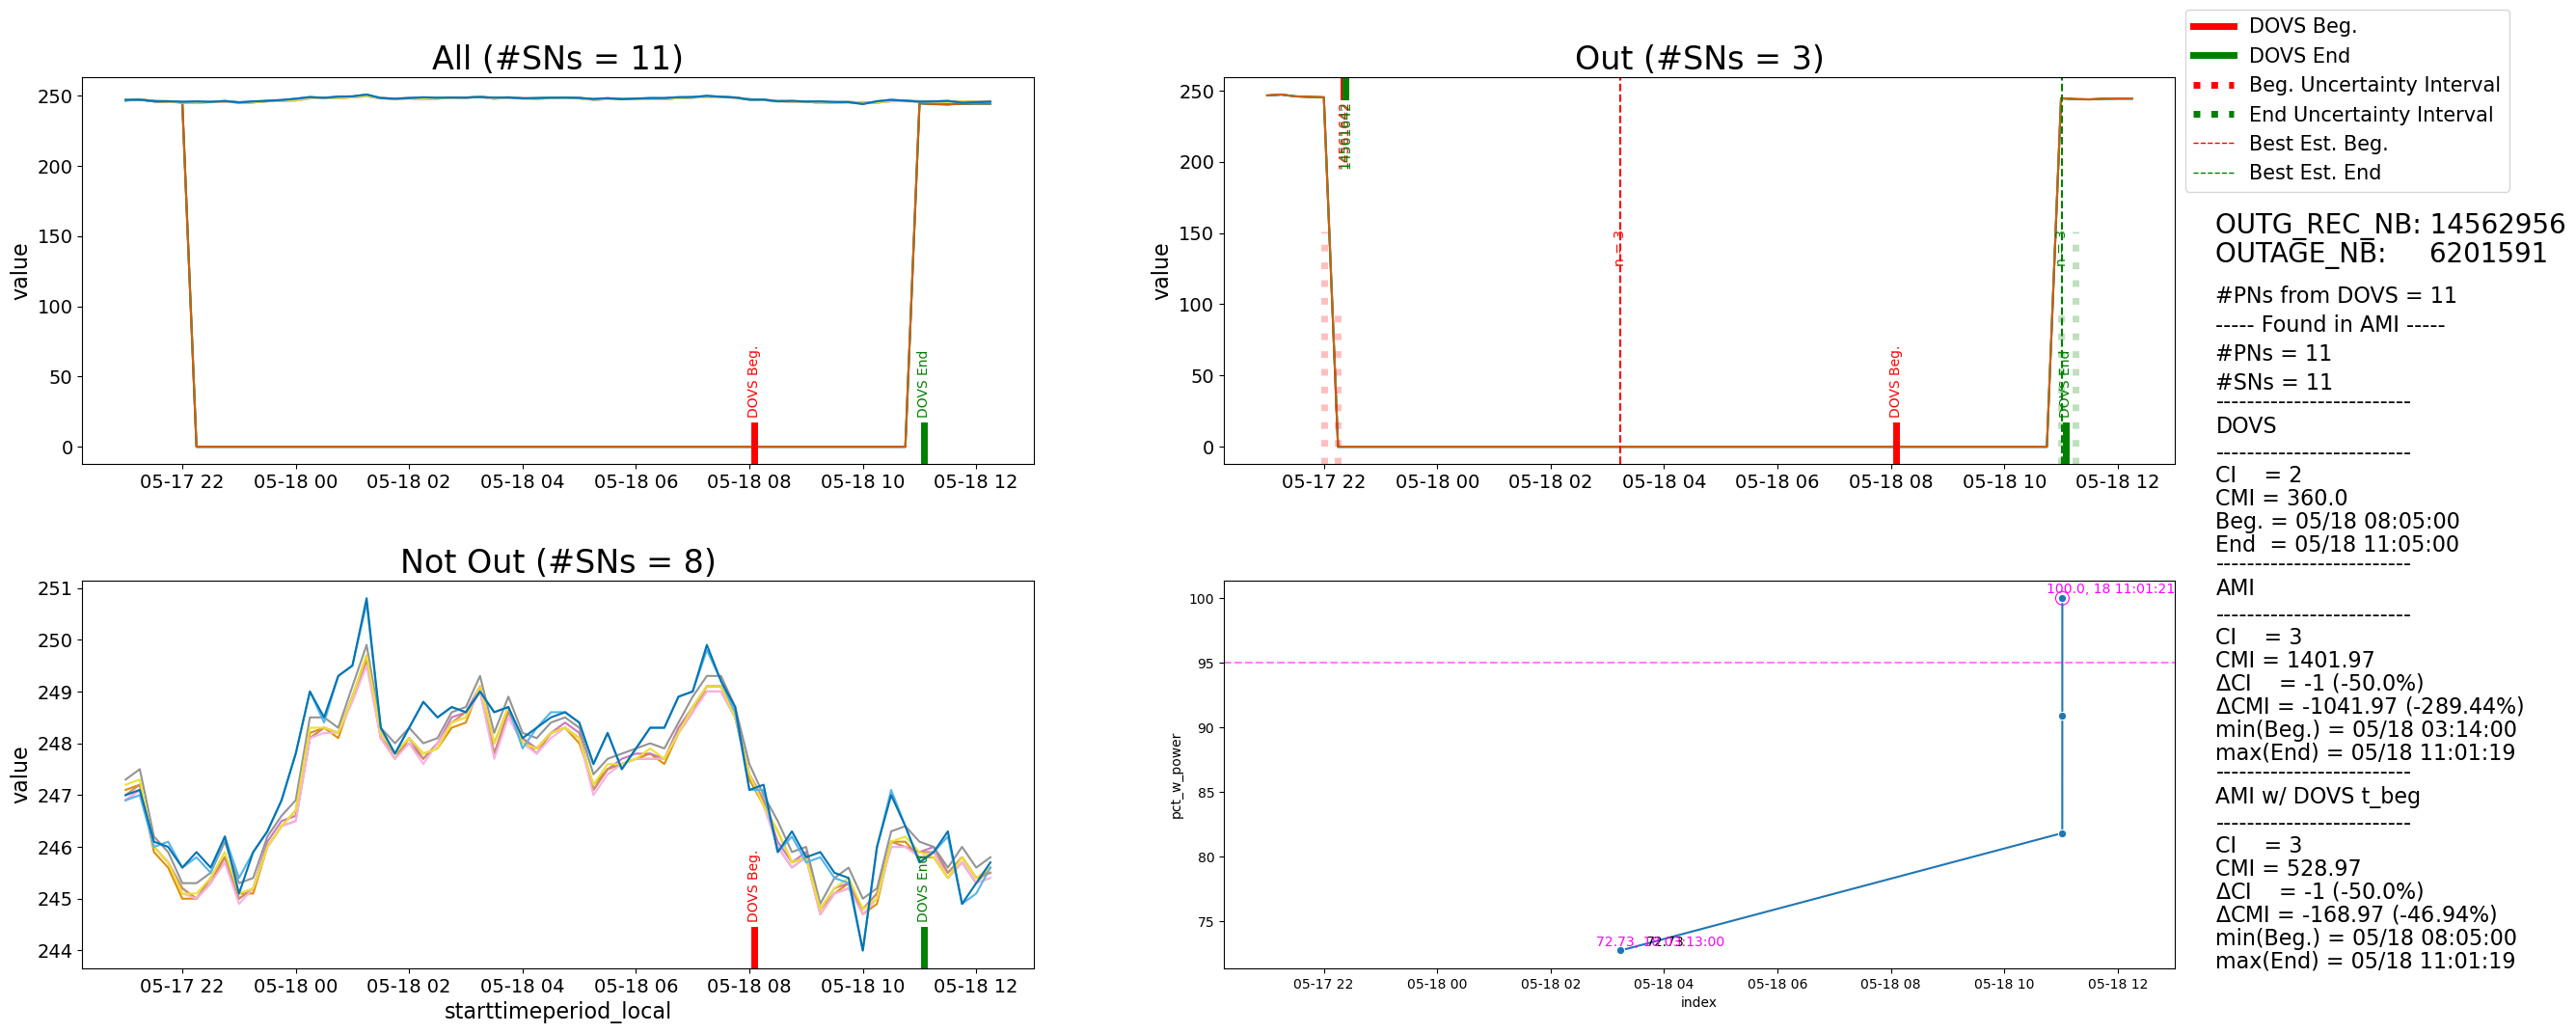

In [11]:
fig_num = 0
#--------------------------------------------------
fig, axs = audit_i.plot_results(
    include_dovs_beg_text      = True, 
    name                       = 'AMI', 
    expand_time                = pd.Timedelta('1 hour'), 
    n_PNs_w_power_threshold    = n_PNs_w_power_threshold, 
    fig_num                    = fig_num
)
fig_num += 1


DOVSOutages_SQL: Found opco in kwargs
Converting to OPERATING_UNIT_ID

Input opcos = ['pso']
OPERATING_UNIT_IDs used = [5]


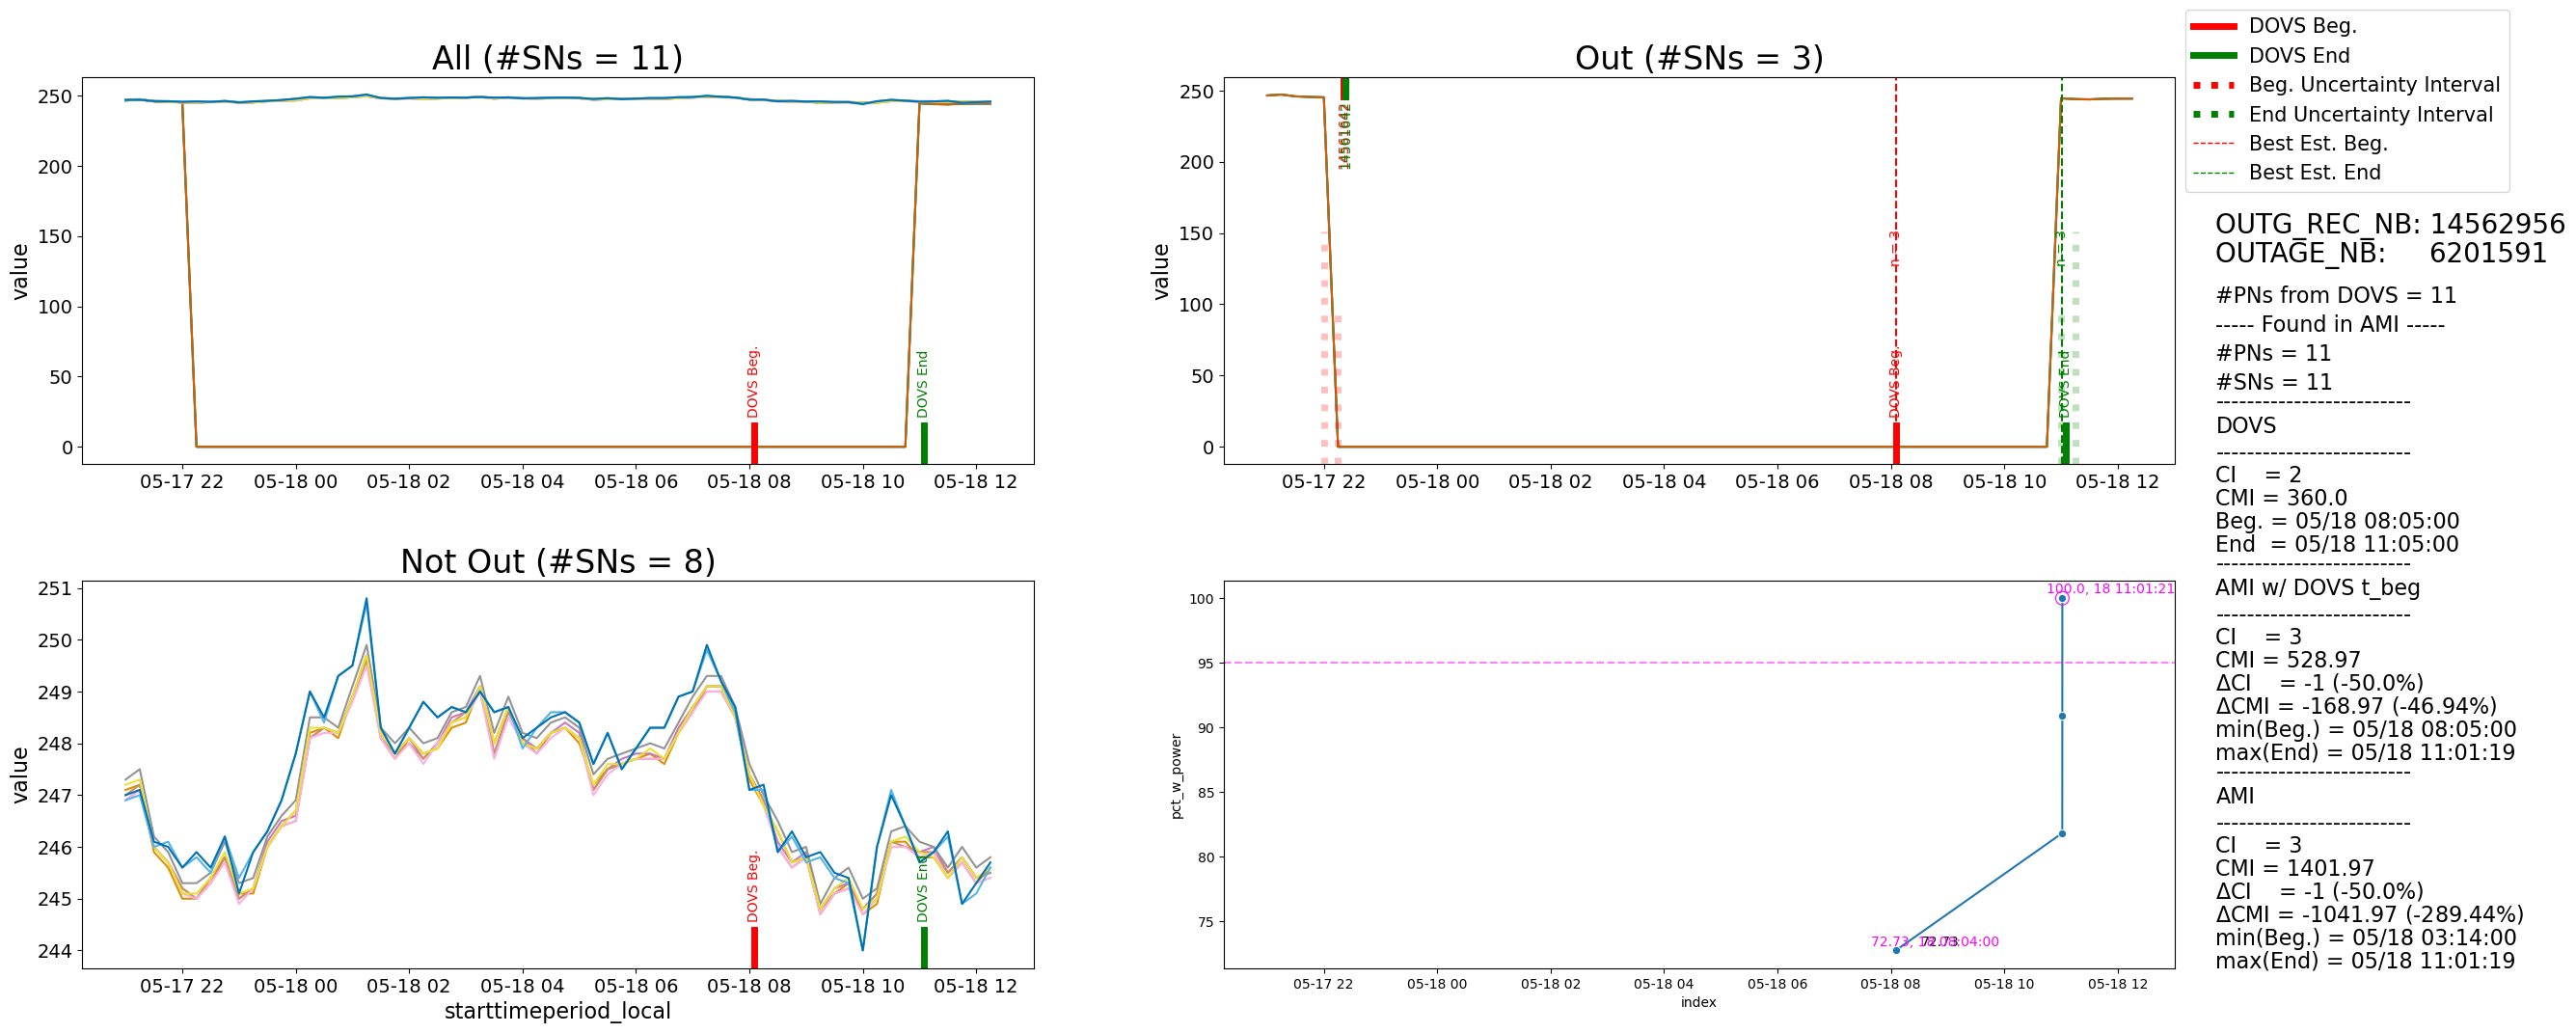

In [12]:
fig, axs = audit_i.plot_results_dovs_beg(
    include_full_alg_text      = True, 
    name                       = 'AMI w/ DOVS t_beg', 
    expand_time                = pd.Timedelta('1 hour'), 
    n_PNs_w_power_threshold    = n_PNs_w_power_threshold, 
    fig_num                    = fig_num
)
fig_num += 1

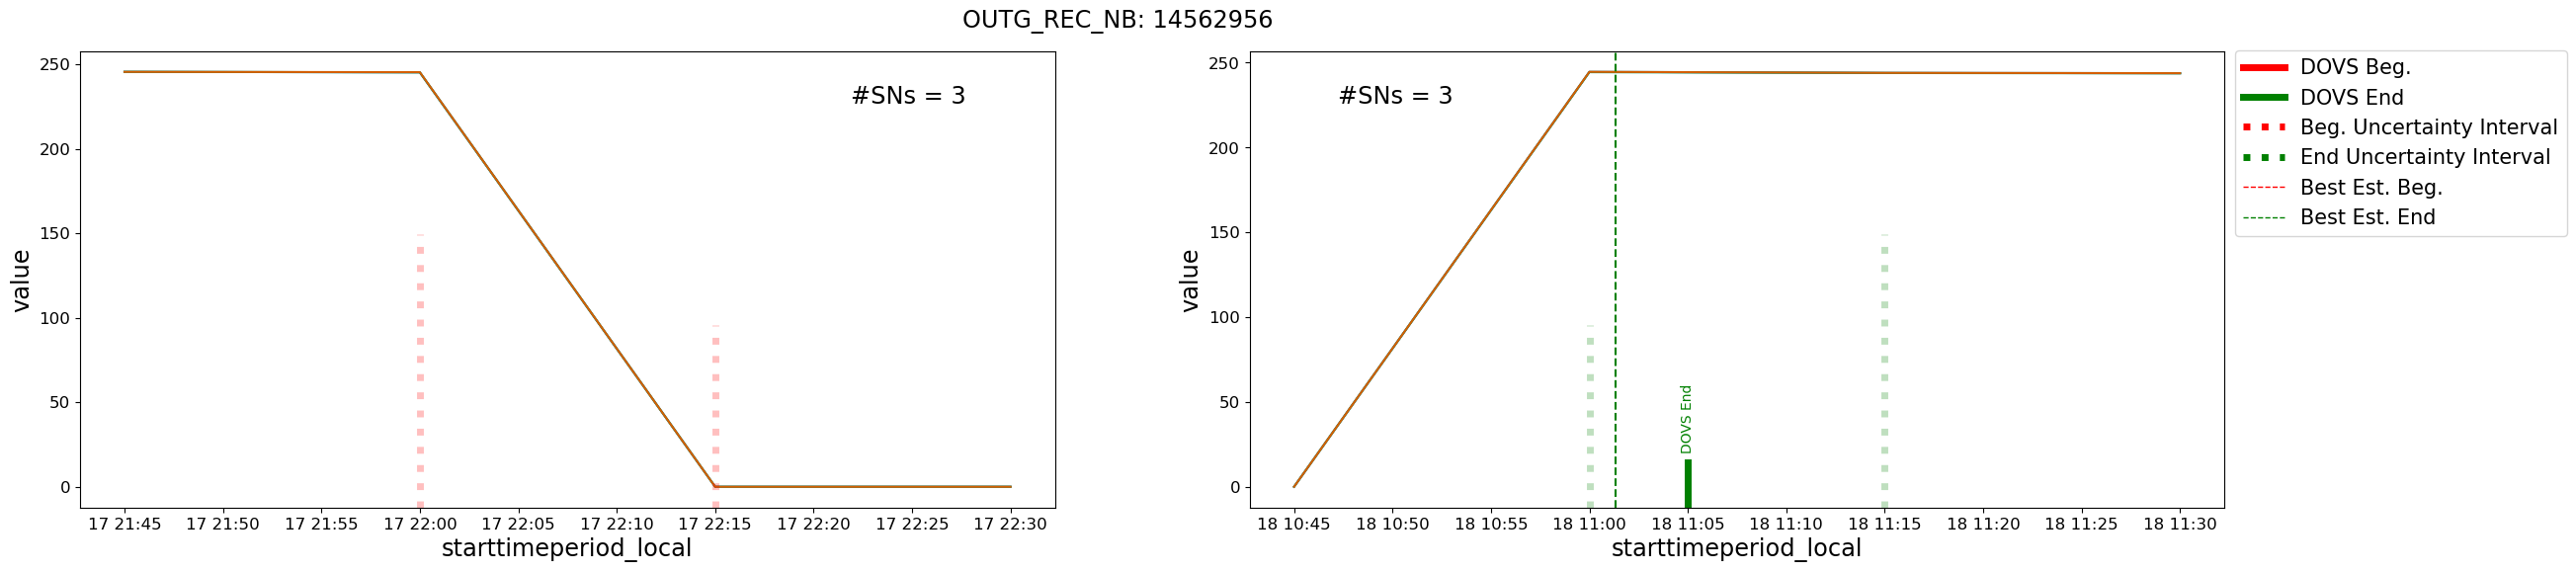

In [13]:
if include_suboutg_endpt_plots:
    fig_axs = audit_i.plot_zoomed_endpts(
        fig_num     = fig_num
    )
    fig_num += 1

In [14]:
audit_i.best_ests_df

,PN,i_outg,winner_min,winner_max,conservative_min,conservative_max,zero_times_min,zero_times_max,open_beg,open_end,db_label
0,952954301,0,2025-05-18 03:14:00,2025-05-18 11:01:17,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,True,False,0
1,953554301,0,2025-05-18 03:14:00,2025-05-18 11:01:21,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,True,False,0
2,958164301,0,2025-05-18 03:14:00,2025-05-18 11:01:20,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,True,False,0


In [15]:
audit_i.best_ests_df_w_keep_info

,PN,i_outg,ede_min,ede_max,dovs_min,dovs_max,conservative_min,conservative_max,zero_times_min,zero_times_max,...,open_beg,open_end,overlap_DOVS,overlap_times,keep,adjustment,resolved,resolved_details,ovrlp_disagree_typeA,ovrlp_disagree_typeB
0,952954301,0,2025-05-17 22:03:54,2025-05-18 11:01:17,NaT,2025-05-18 11:05:00,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,...,True,False,[14561642],"[(2025-05-17 22:21:00, 2025-05-17 22:23:00)]",True,adjust,True,Uncertain,None,None
1,953554301,0,2025-05-17 22:03:54,2025-05-18 11:01:21,NaT,2025-05-18 11:05:00,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,...,True,False,[14561642],"[(2025-05-17 22:21:00, 2025-05-17 22:23:00)]",True,adjust,True,Uncertain,None,None
2,958164301,0,2025-05-17 22:03:54,2025-05-18 11:01:20,NaT,2025-05-18 11:05:00,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,...,True,False,[14561642],"[(2025-05-17 22:21:00, 2025-05-17 22:23:00)]",True,adjust,True,Uncertain,None,None


In [16]:
# audit_i.best_ests_df_w_keep_info.to_pickle(r'C:\Users\s346557\Downloads\we.pkl')

In [17]:
audit_i.best_ests_df.head(1)

,PN,i_outg,winner_min,winner_max,conservative_min,conservative_max,zero_times_min,zero_times_max,open_beg,open_end,db_label
0,952954301,0,2025-05-18 03:14:00,2025-05-18 11:01:17,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,True,False,0


In [18]:
audit_i.best_ests_df_w_keep_info

,PN,i_outg,ede_min,ede_max,dovs_min,dovs_max,conservative_min,conservative_max,zero_times_min,zero_times_max,...,open_beg,open_end,overlap_DOVS,overlap_times,keep,adjustment,resolved,resolved_details,ovrlp_disagree_typeA,ovrlp_disagree_typeB
0,952954301,0,2025-05-17 22:03:54,2025-05-18 11:01:17,NaT,2025-05-18 11:05:00,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,...,True,False,[14561642],"[(2025-05-17 22:21:00, 2025-05-17 22:23:00)]",True,adjust,True,Uncertain,None,None
1,953554301,0,2025-05-17 22:03:54,2025-05-18 11:01:21,NaT,2025-05-18 11:05:00,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,...,True,False,[14561642],"[(2025-05-17 22:21:00, 2025-05-17 22:23:00)]",True,adjust,True,Uncertain,None,None
2,958164301,0,2025-05-17 22:03:54,2025-05-18 11:01:20,NaT,2025-05-18 11:05:00,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,...,True,False,[14561642],"[(2025-05-17 22:21:00, 2025-05-17 22:23:00)]",True,adjust,True,Uncertain,None,None


In [19]:
# audit_i.best_ests_df_w_keep_info['resolved_details'].unique().tolist()

In [20]:
print(audit_i.generate_warnings_text())

****************************************************************************************************
OUTG_REC_NB = 14562956

**************************************************
ALL estimate entries with warnings
----------
,PN,i_outg,ede_min,ede_max,dovs_min,dovs_max,conservative_min,conservative_max,zero_times_min,zero_times_max,winner_min,winner_max,open_beg,open_end,overlap_DOVS,overlap_times,keep,adjustment,resolved,resolved_details,ovrlp_disagree_typeA,ovrlp_disagree_typeB
0,952954301,0,2025-05-17 22:03:54,2025-05-18 11:01:17,,2025-05-18 11:05:00,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,2025-05-18 03:14:00,2025-05-18 11:01:17,True,False,['14561642'],"[(Timestamp('2025-05-17 22:21:00'), Timestamp('2025-05-17 22:23:00'))]",True,adjust,True,Uncertain,,
1,953554301,0,2025-05-17 22:03:54,2025-05-18 11:01:21,,2025-05-18 11:05:00,2025-05-17 22:00:00,2025-05-18 11:15:00,2025-05-17 22:15:00,2025-05-18 11:00:00,2025-05-18 03:14:00,2025-05-18 11:01:21,Tr

In [21]:
audit_i.warnings_dict

{'Resolved but uncertain':           PN  i_outg             ede_min             ede_max dovs_min  \
 0  952954301       0 2025-05-17 22:03:54 2025-05-18 11:01:17      NaT   
 1  953554301       0 2025-05-17 22:03:54 2025-05-18 11:01:21      NaT   
 2  958164301       0 2025-05-17 22:03:54 2025-05-18 11:01:20      NaT   
 
              dovs_max    conservative_min    conservative_max  \
 0 2025-05-18 11:05:00 2025-05-17 22:00:00 2025-05-18 11:15:00   
 1 2025-05-18 11:05:00 2025-05-17 22:00:00 2025-05-18 11:15:00   
 2 2025-05-18 11:05:00 2025-05-17 22:00:00 2025-05-18 11:15:00   
 
        zero_times_min      zero_times_max  ... open_beg open_end  \
 0 2025-05-17 22:15:00 2025-05-18 11:00:00  ...     True    False   
 1 2025-05-17 22:15:00 2025-05-18 11:00:00  ...     True    False   
 2 2025-05-17 22:15:00 2025-05-18 11:00:00  ...     True    False   
 
    overlap_DOVS                                 overlap_times  keep  \
 0    [14561642]  [(2025-05-17 22:21:00, 2025-05-17 22:23:00

# BEG DELETE

In [37]:
df_i = audit_i.ami_df_i[audit_i.ami_df_i['serialnumber']=='760829398']

In [39]:
df_i.head()

,serialnumber,aep_premise_nb,starttimeperiod,endtimeperiod,aep_endtime_utc,timezoneoffset,aep_derived_uom,aep_srvc_qlty_idntfr,value,aep_opco,...,rmvl_ts,trsf_pole_nb,technology_tx,OUTG_REC_NB,aep_endtime_utc_from_timestamp,starttimeperiod_utc,endtimeperiod_utc,starttimeperiod_local,endtimeperiod_local,removed_due_to_overlap
time_idx,,,,,,,,,,,,,,,,,,,,,
2025-05-17 13:30:00,760829398,958164301,2025-05-17T08:15:00-05:00,2025-05-17T08:30:00-05:00,1747488600,-1 days +19:00:00,VOLT,AVG,244.899994,pso,...,NaT,5625186118,AMI,14562956,2025-05-17 13:30:00,2025-05-17 13:15:00,2025-05-17 13:30:00,2025-05-17 08:15:00,2025-05-17 08:30:00,False
2025-05-17 13:45:00,760829398,958164301,2025-05-17T08:30:00-05:00,2025-05-17T08:45:00-05:00,1747489500,-1 days +19:00:00,VOLT,AVG,244.699997,pso,...,NaT,5625186118,AMI,14562956,2025-05-17 13:45:00,2025-05-17 13:30:00,2025-05-17 13:45:00,2025-05-17 08:30:00,2025-05-17 08:45:00,False
2025-05-17 14:00:00,760829398,958164301,2025-05-17T08:45:00-05:00,2025-05-17T09:00:00-05:00,1747490400,-1 days +19:00:00,VOLT,AVG,244.000000,pso,...,NaT,5625186118,AMI,14562956,2025-05-17 14:00:00,2025-05-17 13:45:00,2025-05-17 14:00:00,2025-05-17 08:45:00,2025-05-17 09:00:00,False
2025-05-17 14:15:00,760829398,958164301,2025-05-17T09:00:00-05:00,2025-05-17T09:15:00-05:00,1747491300,-1 days +19:00:00,VOLT,AVG,244.899994,pso,...,NaT,5625186118,AMI,14562956,2025-05-17 14:15:00,2025-05-17 14:00:00,2025-05-17 14:15:00,2025-05-17 09:00:00,2025-05-17 09:15:00,False
2025-05-17 14:30:00,760829398,958164301,2025-05-17T09:15:00-05:00,2025-05-17T09:30:00-05:00,1747492200,-1 days +19:00:00,VOLT,AVG,245.699997,pso,...,NaT,5625186118,AMI,14562956,2025-05-17 14:30:00,2025-05-17 14:15:00,2025-05-17 14:30:00,2025-05-17 09:15:00,2025-05-17 09:30:00,False


In [41]:
outg_est_times = DOVSAudit.estimate_outage_times_for_meter(
    df_i             = df_i, 
    t_search_min_max = [pd.to_datetime('2025-05-17'), pd.to_datetime('2025-05-18')], 
    t_int_beg_col    = 'starttimeperiod_local', 
    t_int_end_col    = 'endtimeperiod_local', 
    value_col        = 'value', 
    SN_col           = 'serialnumber'
)



Expanding search window to include ending of last outage
SN = 760829398
	Org = 2025-05-18 00:00:00
	New = 2025-05-18 11:15:00


In [46]:
outg_est_times

[{'cnsrvtv_t_beg': Timestamp('2025-05-17 22:00:00'),
  'zero_t_beg': Timestamp('2025-05-17 22:15:00'),
  'zero_t_end': Timestamp('2025-05-18 11:00:00'),
  'cnsrvtv_t_end': Timestamp('2025-05-18 11:15:00'),
  'open_beg': False,
  'open_end': False}]

In [51]:
audit_i.ede_df_i

,valuesinterval_local,reason,serialnumber,aep_premise_nb,enddeviceeventtypeid,event_type,trsf_pole_nb,OUTG_REC_NB
0,2025-05-18 11:01:17,NIC Power Restore Trap Received from device,760829397,952954301,3.26.136.216,3,5625186118,14562956
1,2025-05-18 11:00:56,Primary Power Up,760829395,953554301,3.26.0.216,3,5625186118,14562956
2,2025-05-18 11:01:20,NIC Power Restore Trap Received from device,760829398,958164301,3.26.136.216,3,5625186118,14562956
3,2025-05-18 11:00:55,Primary Power Up,760829397,952954301,3.26.0.216,3,5625186118,14562956
4,2025-05-18 11:01:21,NIC Power Restore Trap Received from device,760829395,953554301,3.26.136.216,3,5625186118,14562956
...,...,...,...,...,...,...,...,...
91,2025-05-17 21:24:15,Primary Power Down,997098346,951125611,3.26.0.47,3,5625186118,14562956
92,2025-05-17 21:35:26,NIC Power Restore Trap Received from device,760829468,959694301,3.26.136.216,3,5625186118,14562956
93,2025-05-17 21:24:12,Primary Power Up,760829494,957254301,3.26.0.216,3,5625186118,14562956
94,2025-05-17 21:24:16,Primary Power Down,760829398,958164301,3.26.0.47,3,5625186118,14562956
